<class 'numpy.ndarray'> (352, 352, 3)


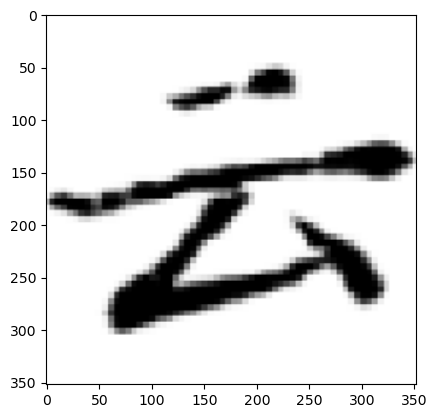

In [43]:
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
import numpy as np

data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

labels = data_labels['arr_0']

Z = labels[:14000]


img = cv2.imread('input_images/KanjiScreenShot.png')   # Read the image
print(type(img),img.shape)
plt.imshow(img)

In [44]:
def resize(image, new_x_dim):
    
    ratio = new_x_dim / image.shape[1]
    new_y_dim = int(image.shape[0] * ratio)
    dim = (new_x_dim, new_y_dim)
    return cv2.resize(image, dim, 1)

<class 'numpy.ndarray'> (64, 64, 3)


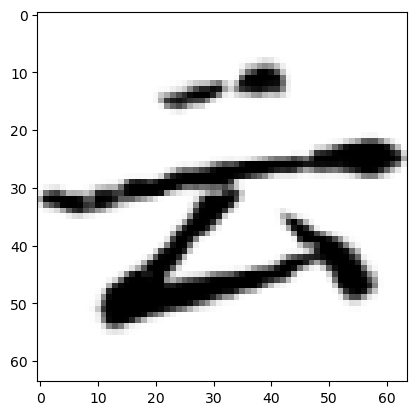

In [45]:
smallImg = resize(img, 64)
print(type(smallImg),smallImg.shape)
plt.imshow(smallImg)

In [46]:
import tensorflow as tf

model = keras.models.load_model('../Kanji-recognizer/saved_sequential_model')

new_image = cv2.cvtColor(smallImg, cv2.COLOR_RGB2GRAY)
new_image = cv2.bitwise_not(new_image)
new_image=np.array(new_image)
new_image=new_image/255


print(type(new_image),new_image.shape)
dim_img = tf.expand_dims(new_image, 0)
print(type(dim_img),dim_img.shape)
predictions = model.predict(dim_img)
print('Predictions shape:', predictions.shape)
print('Predictions:', predictions)
predicted_classes = predictions.argmax(axis=-1)
print('Predicted class:', predicted_classes)

#plt.imshow(dim_img, cmap="gray")
print(dim_img)


<class 'numpy.ndarray'> (64, 64)
<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 64, 64)
1/1 [==============================] - 0s 87ms/step
Predictions shape: (1, 79)
Predictions: [[4.3217327e-07 4.0974374e-08 6.3252719e-07 2.3367980e-05 1.6807104e-05
  2.7185865e-06 1.1257391e-05 3.9119545e-06 1.8751629e-05 4.2217312e-06
  3.7513307e-06 5.6591089e-06 3.7140921e-06 1.0993295e-04 1.5921425e-10
  1.0043225e-03 2.4243845e-06 2.5220927e-05 3.0162118e-04 3.8029873e-05
  2.0726331e-07 1.6219279e-04 1.1540019e-04 3.2041702e-04 8.3529713e-08
  7.1725144e-06 2.2437131e-07 1.5144835e-05 4.9809780e-05 1.2551199e-05
  7.9792109e-05 3.4799453e-04 3.1400191e-09 1.9271627e-09 2.3809939e-06
  7.0445240e-05 1.0331142e-03 2.0685513e-07 5.3564878e-07 4.0568175e-06
  2.0085881e-06 4.8970996e-05 3.0297311e-05 3.7285630e-05 3.9106919e-05
  2.4787136e-03 1.6027133e-03 3.6637241e-05 1.3665031e-05 8.8508918e-05
  1.0235426e-05 5.3455726e-05 1.9514207e-06 3.9959946e-06 2.4422241e-05
  3.2037819e-06 6

In [47]:
import webscraping

def kanji(kaniUnicode):
    return chr(int(kaniUnicode[2:], 16))


print(np.unique(Z)[predicted_classes][0])
print(kanji(np.unique(Z)[predicted_classes][0]))

webscraping.get_meaning(kanji(np.unique(Z)[predicted_classes][0]))

U+4E91
云

say

